## Integrantes

Juan David Contreras - 2201432\
Fandry Lizeth Bernal - 2205619\
Luna Valentina Gaona - 2215504

## Librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
sns.set_theme()

## Dataframe

In [2]:
#d son los datos de las peliculas
d = pd.read_csv("https://drive.google.com/uc?export=download&id=1ijzk7TcAptDFyNnVrbzpuZ68qL45V5Ln", sep=",")
#r son los datos de las calificaciones
#r = pd.read_csv("https://drive.google.com/uc?export=download&id=18sT67qQRAbPaML3oZvvEDeb9vBcZIjwG", sep=",")
# Separar el año del título de la película
d[['title', 'year']] = d['title'].str.extract(r'(.+) \((\d{4})\)')
#Crear columna de años en numérico
d['year_numeric'] = pd.to_numeric(d['year'])
#Crear columna title_lenght
d['title'] = d['title'].fillna('')
d['title_length'] = d['title'].apply(lambda x: len(x))
type(d)

pandas.core.frame.DataFrame

Muestra del dataset

In [3]:
print("columns and shape", d.columns, d.shape)
print("---------------- \n Display data \n---------------")
d.head(29)

columns and shape Index(['movieId', 'title', 'genres', 'year', 'year_numeric', 'title_length'], dtype='object') (62423, 6)
---------------- 
 Display data 
---------------


movieId                                              title  \
0         1                                          Toy Story   
1         2                                            Jumanji   
2         3                                   Grumpier Old Men   
3         4                                  Waiting to Exhale   
4         5                        Father of the Bride Part II   
5         6                                               Heat   
6         7                                            Sabrina   
7         8                                       Tom and Huck   
8         9                                       Sudden Death   
9        10                                          GoldenEye   
10       11                            American President, The   
11       12                        Dracula: Dead and Loving It   
12       13                                              Balto   
13       14                                              Nixon   
14       15                                   Cutthroat Island   
15       16                                             Casino   
16       17                              Sense and Sensibility   
17       18                                         Four Rooms   
18       19                     Ace Ventura: When Nature Calls   
19       20                                        Money Train   
20       21                                         Get Shorty   
21       22                                            Copycat   
22       23                                          Assassins   
23       24                                             Powder   
24       25                                  Leaving Las Vegas   
25       26                                            Othello   
26       27                                       Now and Then   
27       28                                         Persuasion   
28       29  City of Lost Children, The (Cité des enfants p...   

                                         genres  year  year_numeric  \
0   Adventure|Animation|Children|Comedy|Fantasy  1995        1995.0   
1                    Adventure|Children|Fantasy  1995        1995.0   
2                                Comedy|Romance  1995        1995.0   
3                          Comedy|Drama|Romance  1995        1995.0   
4                                        Comedy  1995        1995.0   
5                         Action|Crime|Thriller  1995        1995.0   
6                                Comedy|Romance  1995        1995.0   
7                            Adventure|Children  1995        1995.0   
8                                        Action  1995        1995.0   
9                     Action|Adventure|Thriller  1995        1995.0   
10                         Comedy|Drama|Romance  1995        1995.0   
11                                Comedy|Horror  1995        1995.0   
12                 Adventure|Animation|Children  1995        1995.0   
13                                        Drama  1995        1995.0   
14                     Action|Adventure|Romance  1995        1995.0   
15                                  Crime|Drama  1995        1995.0   
16                                Drama|Romance  1995        1995.0   
17                                       Comedy  1995        1995.0   
18                                       Comedy  1995        1995.0   
19           Action|Comedy|Crime|Drama|Thriller  1995        1995.0   
20                        Comedy|Crime|Thriller  1995        1995.0   
21          Crime|Drama|Horror|Mystery|Thriller  1995        1995.0   
22                        Action|Crime|Thriller  1995        1995.0   
23                                 Drama|Sci-Fi  1995        1995.0   
24                                Drama|Romance  1995        1995.0   
25                                        Drama  1995        1995.0   
26                               Children|Drama  1995        1995.0   
27                                D

Información

In [4]:
print(d.describe())
print(d.info())

             movieId  year_numeric  title_length
count   62423.000000  62007.000000  62423.000000
mean   122220.387646   1992.046559     18.345049
std     63264.744844     25.365127     11.777103
min         1.000000   1874.000000      0.000000
25%     82146.500000   1976.000000     11.000000
50%    138022.000000   2002.000000     16.000000
75%    173222.000000   2012.000000     22.000000
max    209171.000000   2019.000000    184.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62423 entries, 0 to 62422
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   movieId       62423 non-null  int64  
 1   title         62423 non-null  object 
 2   genres        62423 non-null  object 
 3   year          62007 non-null  object 
 4   year_numeric  62007 non-null  float64
 5   title_length  62423 non-null  int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 2.9+ MB
None


Filas y columnas

In [5]:
#shape
print("Filas:", d.shape[0])
print("Columnas:", d.shape[1])
#columns
print(d.columns)

Filas: 62423
Columnas: 6
Index(['movieId', 'title', 'genres', 'year', 'year_numeric', 'title_length'], dtype='object')


Detectando valores nulos

In [6]:
#very important to clean values.
for col in d.columns:
    print (col, np.sum(pd.isnull(d[col])))

movieId 0
title 0
genres 0
year 416
year_numeric 416
title_length 0


Llenando los valores nulos

In [7]:
d['year_numeric'].fillna(d['year_numeric'].mean(), inplace=True)
d['year'] = d['year'].fillna('Desconocido')
for col in d.columns:
    print (col, np.sum(pd.isnull(d[col])))

movieId 0
title 0
genres 0
year 0
year_numeric 0
title_length 0


## Gráficas

Plots

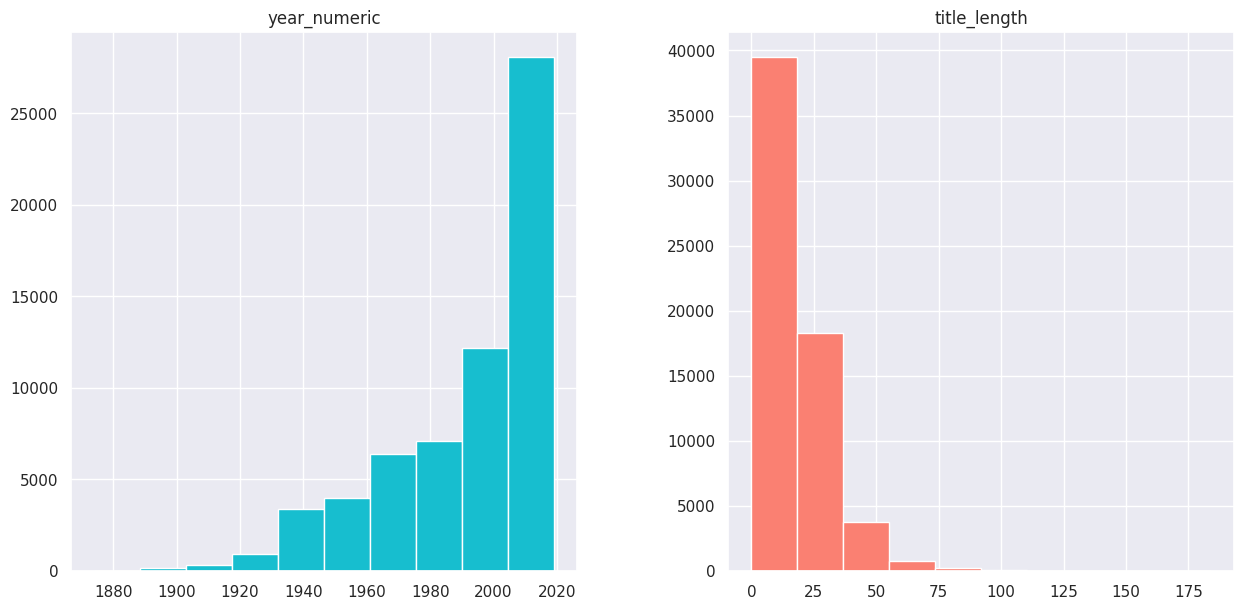

In [8]:
plt.figure(figsize = (15, 7))
ax= plt.subplot(1,2,1)
d.hist('year_numeric', ax=ax, color='tab:cyan');
ax=plt.subplot(1,2,2)
d.hist('title_length', ax=ax, color='salmon');

Bar

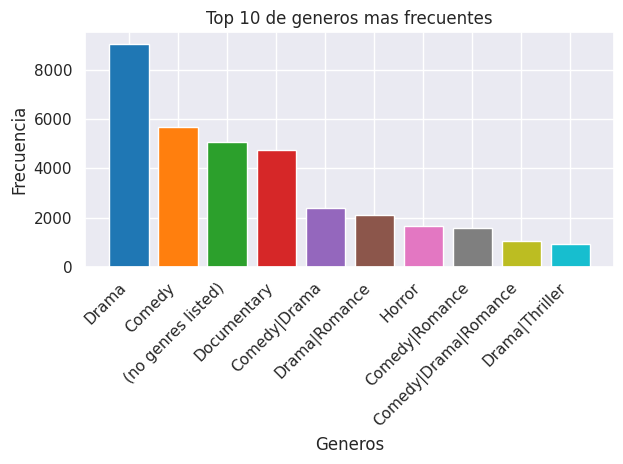

In [ ]:
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']
top_genres = d['genres'].str.split(',').explode().value_counts().head(10)
plt.bar(top_genres.index, top_genres.values, color=colors)

plt.xticks(rotation=45, ha='right')
plt.xlabel('Generos')
plt.ylabel('Frecuencia')
plt.title('Top 10 de generos mas frecuentes')
plt.tight_layout()
plt.show()

Pie

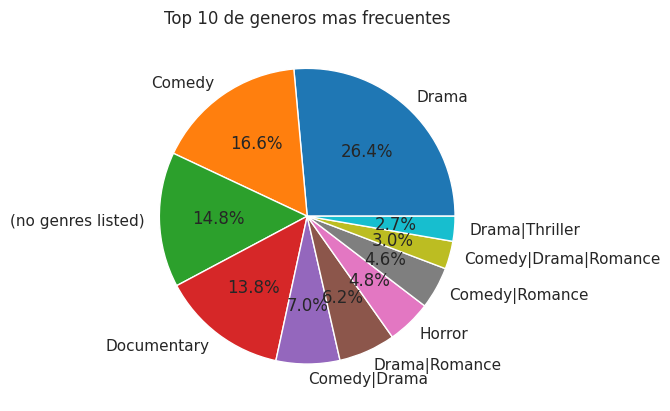

In [ ]:

fig, ax = plt.subplots()
wedges, texts, autotexts = ax.pie(top_genres, labels=top_genres.index, autopct='%1.1f%%', colors=colors)
colors = ['#BA55D3', '#33FF57', '#5733FF', '#20B2AA', '#33FFFF', '#FF33FF', '#F08080', '#BFBF00', '#7CFC00', '#DC143C']
ax.set_title('Top 10 de generos mas frecuentes')
plt.show()

Scatter

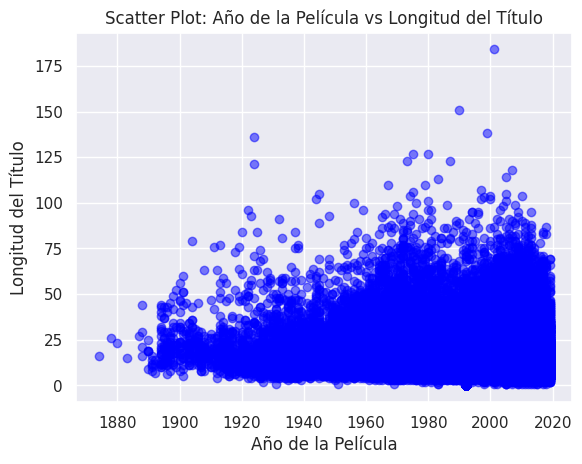

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd


plt.scatter(d['year_numeric'], d['title_length'], color='blue', alpha=0.5)
plt.xlabel('Año de la Película')
plt.ylabel('Longitud del Título')
plt.title('Scatter Plot: Año de la Película vs Longitud del Título')
plt.grid(True)
plt.show()

Joinplot

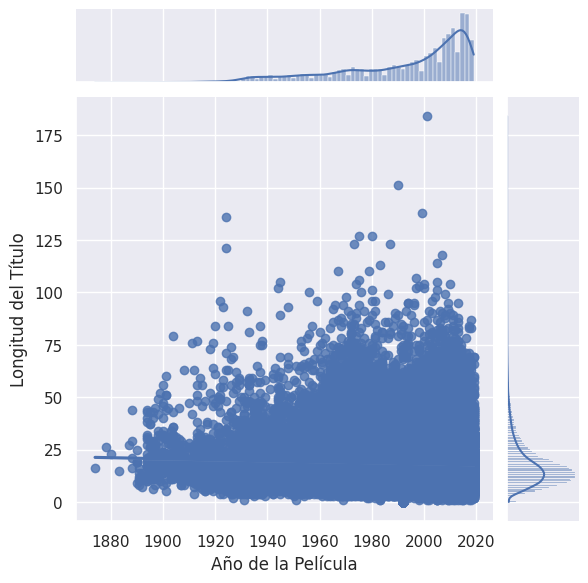

In [ ]:
sns.jointplot(x='year_numeric', y='title_length', data=d, kind='reg')
plt.xlabel('Año de la Película')
plt.ylabel('Longitud del Título')
plt.show()

Separando por género.

In [9]:
d['title'] = d['title'].fillna('')
d['title_length'] = d['title'].apply(lambda x: len(x))
genre_dummies = d['genres'].str.get_dummies(sep='|')
d = pd.concat([d, genre_dummies], axis=1)
d.head(10)

movieId                        title  \
0        1                    Toy Story   
1        2                      Jumanji   
2        3             Grumpier Old Men   
3        4            Waiting to Exhale   
4        5  Father of the Bride Part II   
5        6                         Heat   
6        7                      Sabrina   
7        8                 Tom and Huck   
8        9                 Sudden Death   
9       10                    GoldenEye   

                                        genres  year  year_numeric  \
0  Adventure|Animation|Children|Comedy|Fantasy  1995        1995.0   
1                   Adventure|Children|Fantasy  1995        1995.0   
2                               Comedy|Romance  1995        1995.0   
3                         Comedy|Drama|Romance  1995        1995.0   
4                                       Comedy  1995        1995.0   
5                        Action|Crime|Thriller  1995        1995.0   
6                               Comedy|Romance  1995        1995.0   
7                           Adventure|Children  1995        1995.0   
8                                       Action  1995        1995.0   
9                    Action|Adventure|Thriller  1995        1995.0   

   title_length  (no genres listed)  Action  Adventure  Animation  ...  \
0             9                   0       0          1          1  ...   
1             7                   0       0          1          0  ...   
2            16                   0       0          0          0  ...   
3            17                   0       0          0          0  ...   
4            27                   0       0          0          0  ...   
5             4                   0       1          0          0  ...   
6             7                   0       0          0          0  ...   
7            12                   0       0          1          0  ...   
8            12                   0       1          0          0  ...   
9             9                   0       1          1          0  ...   

   Film-Noir  Horror  IMAX  Musical  Mystery  Romance  Sci-Fi  Thriller  War  \
0          0       0     0        0        0        0       0         0    0   
1          0       0     0        0        0        0       0         0    0   
2          0       0     0        0        0        1       0         0    0   
3          0       0     0        0        0        1       0         0    0   
4          0       0     0        0        0        0       0         0    0   
5          0       0     0        0        0        0       0         1    0   
6          0       0     0        0        0        1       0         0    0   
7          0       0     0        0        0        0       0         0    0   
8          0       0     0        0        0        0       0         0    0   
9          0       0     0        0        0        0       0         1    0   

   Western  
0        0  
1        0  
2        0  
3        0  
4        0  
5        0  
6        0  
7        0  
8        0  
9        0  

[10 rows x 26 columns]

Definiendo test split

In [ ]:
# Seleccionar un género para predecir (por ejemplo, 'Comedy')
target_genre = 'Comedy'
y = d[target_genre]
X = d[['title_length', 'year_numeric']]

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)
print("Tamaño del conjunto de entrenamiento:", X_train.shape)
print("Tamaño del conjunto de prueba:", X_test.shape)
print("\nPrimeras filas del conjunto de entrenamiento:")
print(X_train.head())
print(y_train.head())
print("\nPrimeras filas del conjunto de prueba:")
print(X_test.head())
print(y_test.head())

Tamaño del conjunto de entrenamiento: (49938, 2)
Tamaño del conjunto de prueba: (12485, 2)

Primeras filas del conjunto de entrenamiento:
       title_length  year_numeric
6182             16        2003.0
33996            13        2005.0
18558            19        1972.0
30236             6        1990.0
48293             4        2008.0
6182     0
33996    1
18558    0
30236    0
48293    0
Name: Comedy, dtype: int64

Primeras filas del conjunto de prueba:
       title_length  year_numeric
17454            14        1944.0
8205             17        1954.0
39043            20        1948.0
57137            12        1994.0
44444            10        2017.0
17454    1
8205     0
39043    1
57137    0
44444    0
Name: Comedy, dtype: int64


Decision TreeClassifier

In [ ]:
# Inicializar el clasificador DecisionTreeClassifier con parámetros por defecto
clf = DecisionTreeClassifier()

# Entrenar el modelo
clf.fit(X_train, y_train)

# Predecir los datos de prueba
y_pred = clf.predict(X_test)

# Calcular y reportar el accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy del modelo DecisionTreeClassifier:", accuracy)

Accuracy del modelo DecisionTreeClassifier: 0.7105326391670004


Tunning DecisionTree

In [ ]:
# Definir los parámetros a buscar en el tuning
param_grid = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'criterion': ['gini', 'entropy']
}

# Configurar el GridSearchCV
grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy')

# Entrenar el GridSearchCV
grid_search.fit(X_train, y_train)

# Obtener los mejores parámetros
best_params = grid_search.best_params_
print("Mejores parámetros encontrados:", best_params)

# Entrenar el modelo con los mejores parámetros
best_clf = grid_search.best_estimator_
best_clf.fit(X_train, y_train)

# Predecir los datos de prueba
y_pred = best_clf.predict(X_test)

# Calcular y reportar el accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy del modelo con mejores parámetros:", accuracy)

Mejores parámetros encontrados: {'criterion': 'entropy', 'max_depth': 10}
Accuracy del modelo con mejores parámetros: 0.7268722466960352


Random Forest

In [ ]:
# Inicializar el clasificador RandomForestClassifier con parámetros por defecto
clf = RandomForestClassifier()

# Entrenar el modelo
clf.fit(X_train, y_train)

# Predecir los datos de prueba
y_pred = clf.predict(X_test)

# Calcular y reportar el accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy del modelo RandomForestClassifier con parámetros por defecto:", accuracy)

Accuracy del modelo RandomForestClassifier con parámetros por defecto: 0.7046856227472967


Tunning Random Forest

In [ ]:
# Definir los parámetros a buscar en el tuning
param_grid = {
    'n_estimators': [10, 50],
    'max_depth': [None, 10, 20],
    'criterion': ['gini', 'entropy']
}

# Configurar el GridSearchCV
grid_search = GridSearchCV(clf, param_grid, cv=3, scoring='accuracy')

# Entrenar el GridSearchCV
grid_search.fit(X_train, y_train)

# Obtener los mejores parámetros
best_params = grid_search.best_params_
print("Mejores parámetros encontrados:", best_params)

# Entrenar el modelo con los mejores parámetros
best_clf = grid_search.best_estimator_
best_clf.fit(X_train, y_train)

# Predecir los datos de prueba
y_pred = best_clf.predict(X_test)

# Calcular y reportar el accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy del modelo RandomForestClassifier con mejores parámetros:", accuracy)

Mejores parámetros encontrados: {'criterion': 'entropy', 'max_depth': 10, 'n_estimators': 50}
Accuracy del modelo RandomForestClassifier con mejores parámetros: 0.7280736884261113


SVC

In [ ]:
# Crear un clasificador SVC con parámetros por defecto
clf = SVC()

# Entrenar el modelo con los datos de entrenamiento
clf.fit(X_train, y_train)

# Predecir sobre el conjunto de prueba
y_pred = clf.predict(X_test)

# Calcular el accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy del clasificador SVC con parámetros por defecto: {accuracy}")

Accuracy del clasificador SVC con parámetros por defecto: 0.7283139767721265


Tunning SVC

In [ ]:
# Definir las combinaciones de parámetros a probar manualmente
param_combinations = [
    {'kernel': 'linear', 'C': 10, 'gamma': 'scale'},
    {'kernel': 'rbf', 'C': 10, 'gamma': 'scale'}
]

# Entrenar y evaluar el clasificador SVC para cada combinación de parámetros
for params in param_combinations:
    svc = SVC(kernel=params['kernel'], C=params['C'], gamma=params['gamma'])
    svc.fit(X_train, y_train)
    y_pred = svc.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Parámetros: {params} - Accuracy: {accuracy}")

Parámetros: {'kernel': 'linear', 'C': 10, 'gamma': 'scale'} - Accuracy: 0.7283139767721265
Parámetros: {'kernel': 'rbf', 'C': 10, 'gamma': 'scale'} - Accuracy: 0.7283139767721265


Redes Neuronales

In [ ]:
# Cargar el conjunto de datos Iris
data = load_iris()
X, y = data.data, data.target

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

# Escalar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train_scaled.shape[1],)),  # Capa de entrada
    tf.keras.layers.Dense(10, activation='relu'),  # Capa oculta con 10 neuronas y función de activación ReLU
    tf.keras.layers.Dense(3, activation='softmax')  # Capa de salida con 3 clases y función de activación softmax
])

# Compilar el modelo
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
epochs_list = [10, 20, 30]

for epochs in epochs_list:
    model.fit(X_train_scaled, y_train, epochs=epochs, verbose=0)

    # Predecir las etiquetas en el conjunto de prueba
    y_pred = model.predict(X_test_scaled)
    y_pred_classes = np.argmax(y_pred, axis=1)

    # Calcular la precisión
    accuracy = accuracy_score(y_test, y_pred_classes)
    print(f"Accuracy (epochs={epochs}): {accuracy:.4f}")

1/1 [==============================] - 0s 113ms/step
Accuracy (epochs=10): 0.8333
1/1 [==============================] - 0s 85ms/step
Accuracy (epochs=20): 0.8000
1/1 [==============================] - 0s 115ms/step
Accuracy (epochs=30): 0.8333


In [ ]:

model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train_scaled.shape[1],)),  # Capa de entrada
    tf.keras.layers.Dense(8, activation='relu'),  # Primera capa oculta con 8 neuronas y función de activación ReLU
    tf.keras.layers.Dense(6, activation='relu'),  # Segunda capa oculta con 6 neuronas y función de activación ReLU
    tf.keras.layers.Dense(4, activation='relu'),  # Tercera capa oculta con 4 neuronas y función de activación ReLU
    tf.keras.layers.Dense(3, activation='softmax')  # Capa de salida con 3 clases y función de activación softmax
])

# Compilar el modelo
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
for epochs in epochs_list:
    model.fit(X_train_scaled, y_train, epochs=epochs, verbose=0)

    # Predecir las etiquetas en el conjunto de prueba
    y_pred = model.predict(X_test_scaled)
    y_pred_classes = np.argmax(y_pred, axis=1)

    # Calcular la precisión
    accuracy = accuracy_score(y_test, y_pred_classes)
    print(f"Accuracy (epochs={epochs}): {accuracy:.4f}")

1/1 [==============================] - 0s 71ms/step
Accuracy (epochs=10): 0.3333
1/1 [==============================] - 0s 21ms/step
Accuracy (epochs=20): 0.6333
1/1 [==============================] - 0s 21ms/step
Accuracy (epochs=30): 0.7000


In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train_scaled.shape[1],)),  # Capa de entrada
    tf.keras.layers.Dense(16, activation='relu'),  # Primera capa oculta con 16 neuronas y función de activación ReLU
    tf.keras.layers.Dense(12, activation='relu'),  # Segunda capa oculta con 12 neuronas y función de activación ReLU
    tf.keras.layers.Dense(10, activation='relu'),  # Tercera capa oculta con 10 neuronas y función de activación ReLU
    tf.keras.layers.Dense(8, activation='relu'),   # Cuarta capa oculta con 8 neuronas y función de activación ReLU
    tf.keras.layers.Dense(6, activation='relu'),   # Quinta capa oculta con 6 neuronas y función de activación ReLU
    tf.keras.layers.Dense(4, activation='relu'),   # Sexta capa oculta con 4 neuronas y función de activación ReLU
    tf.keras.layers.Dense(3, activation='softmax')  # Capa de salida con 3 clases y función de activación softmax
])

# Compilar el modelo
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Entrenar el modelo con diferentes números de epochs
epochs_list = [10, 20, 30]

for epochs in epochs_list:
    model.fit(X_train_scaled, y_train, epochs=epochs, verbose=0)

    # Predecir las etiquetas en el conjunto de prueba
    y_pred = model.predict(X_test_scaled)
    y_pred_classes = np.argmax(y_pred, axis=1)

    # Calcular la precisión
    accuracy = accuracy_score(y_test, y_pred_classes)
    print(f"Accuracy (epochs={epochs}): {accuracy:.4f}")

1/1 [==============================] - 0s 87ms/step
Accuracy (epochs=10): 0.5333
1/1 [==============================] - 0s 42ms/step
Accuracy (epochs=20): 0.6000
1/1 [==============================] - 0s 37ms/step
Accuracy (epochs=30): 0.8667


Decision Tree con Cross Validation

In [ ]:
# Inicializar el clasificador DecisionTree
dt = DecisionTreeClassifier(random_state=41)

# Configurar KFold con 10 splits
kf = KFold(n_splits=10, shuffle=True, random_state=41)

# Calcular los accuracy_scores con cross_val_score
scores = cross_val_score(dt, X, y, cv=kf, scoring='accuracy')

# Calcular la media y la desviación estándar
mean_score = scores.mean()
std_score = scores.std()

print(f"Decision Tree Classifier - Cross-Validation Accuracy: Mean = {mean_score}, Std = {std_score}")

Decision Tree Classifier - Cross-Validation Accuracy: Mean = 0.9533333333333334, Std = 0.04268749491621898
